In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
# Reading Dataset
df = pd.read_csv('../../data/XAUUSD_2010-2023.csv').head(100_00)

In [3]:
# Dataset Overview
df.head(5)

,time,open,high,low,close,rsi14,sma14
0,2010-01-03 18:00:00,1098.45,1100.0,1098.05,1099.95,81.98,1096.38
1,2010-01-03 18:05:00,1100.00,1100.3,1099.45,1099.75,79.17,1096.72
2,2010-01-03 18:10:00,1099.70,1100.1,1099.30,1099.45,75.02,1097.03
3,2010-01-03 18:15:00,1099.50,1099.6,1098.50,1099.45,75.02,1097.30
4,2010-01-03 18:20:00,1099.40,1099.6,1098.90,1098.90,67.50,1097.50


In [4]:
# number of rows and columns
df.shape

(10000, 7)

In [5]:
# check for missing values
df.isnull().sum()

time     0
open     0
high     0
low      0
close    0
rsi14    0
sma14    0
dtype: int64

In [6]:

# getting some basic informations about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    10000 non-null  object 
 1   open    10000 non-null  float64
 2   high    10000 non-null  float64
 3   low     10000 non-null  float64
 4   close   10000 non-null  float64
 5   rsi14   10000 non-null  float64
 6   sma14   10000 non-null  float64
dtypes: float64(6), object(1)
memory usage: 547.0+ KB


In [7]:
# checking the number of missing values
df.isnull().sum()

time     0
open     0
high     0
low      0
close    0
rsi14    0
sma14    0
dtype: int64

In [8]:
# getting the statistical measures of the data
df.describe()

,open,high,low,close,rsi14,sma14
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1108.263349,1108.794160,1107.731987,1108.263112,50.438189,1108.251465
std,24.118269,24.069989,24.173850,24.115152,11.350697,24.081460
min,1048.580000,1050.450000,1044.180000,1048.530000,9.130000,1050.850000
25%,1090.922500,1091.500000,1090.372500,1090.930000,42.790000,1090.830000
50%,1109.365000,1109.850000,1108.965000,1109.350000,50.400000,1109.480000
75%,1128.000000,1128.500000,1127.380000,1127.985000,58.160000,1128.117500
max,1160.250000,1161.880000,1158.950000,1160.330000,91.980000,1158.230000


In [9]:
# Checking Duplicates
df.duplicated().sum()

0

In [10]:
# Checking Missing Values
df.isnull().sum().sum()

0

In [11]:
# Preprocess the data
df = df.dropna()  # Handle missing values

In [12]:
df['time'] = pd.to_datetime(df['time'])
df.sort_values(by='time', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)
df.index = df['time']

In [13]:
# df.drop(['time'], axis=1, inplace=True)
# NumCols = df.columns.drop(['Date'])
# df[NumCols] = df[NumCols].replace({',': ''}, regex=True)
# df[NumCols] = df[NumCols].astype('float64')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10000 entries, 2010-01-03 18:00:00 to 2010-02-22 19:30:00
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    10000 non-null  datetime64[ns]
 1   open    10000 non-null  float64       
 2   high    10000 non-null  float64       
 3   low     10000 non-null  float64       
 4   close   10000 non-null  float64       
 5   rsi14   10000 non-null  float64       
 6   sma14   10000 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 625.0 KB


,time,open,high,low,close,rsi14,sma14
time,,,,,,,
2010-01-03 18:00:00,2010-01-03 18:00:00,1098.45,1100.00,1098.05,1099.95,81.98,1096.38
2010-01-03 18:05:00,2010-01-03 18:05:00,1100.00,1100.30,1099.45,1099.75,79.17,1096.72
2010-01-03 18:10:00,2010-01-03 18:10:00,1099.70,1100.10,1099.30,1099.45,75.02,1097.03
2010-01-03 18:15:00,2010-01-03 18:15:00,1099.50,1099.60,1098.50,1099.45,75.02,1097.30
2010-01-03 18:20:00,2010-01-03 18:20:00,1099.40,1099.60,1098.90,1098.90,67.50,1097.50
...,...,...,...,...,...,...,...
2010-02-22 19:10:00,2010-02-22 19:10:00,1115.58,1115.70,1115.13,1115.38,65.11,1113.17
2010-02-22 19:15:00,2010-02-22 19:15:00,1115.35,1115.35,1113.78,1114.38,55.44,1113.27
2010-02-22 19:20:00,2010-02-22 19:20:00,1114.40,1114.88,1114.28,1114.45,55.93,1113.43


In [14]:
df_cp = df.copy()
df = df.drop(
    columns=['rsi14', 'sma14', 'time'], axis=1
)

In [15]:
correlation = df.corr()

<Axes: >

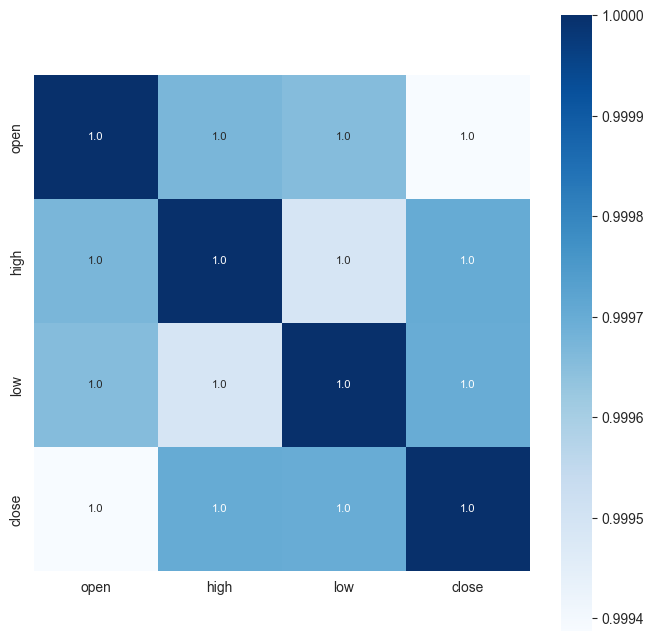

In [16]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize=(8, 8))
sns.heatmap(
    correlation,
    cbar=True,
    square=True,
    fmt='.1f',
    annot=True,
    annot_kws={'size': 8},
    cmap='Blues'
)

In [17]:
# correlation values of GLD
print(correlation['close'])

open     0.999387
high     0.999701
low      0.999699
close    1.000000
Name: close, dtype: float64


In [18]:
X = df.drop(['open'], axis=1)
Y = df['open']

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [20]:
# loading the model
model = XGBRegressor()

In [21]:
# training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [22]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [23]:
print(training_data_prediction)

[1118.3839 1158.0098 1089.9475 ... 1062.607  1139.4692 1069.2278]


In [24]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9997949387911853
Mean Absolute Error :  0.2585109185791033


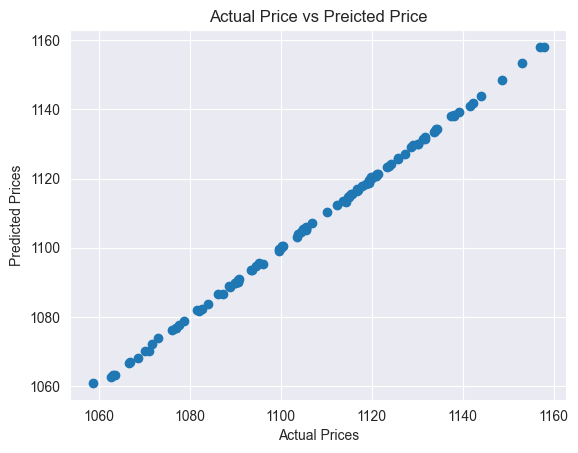

In [26]:
plt.scatter(
    Y_train[:100],
    training_data_prediction[:100],
)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [27]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [28]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9995879624094643
Mean Absolute Error :  0.33937281005859393
